In [ ]:
'''
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem 
with the “naive” assumption of independence between every pair of features. 

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, 
famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of
the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. 
This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, 
it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
'''

In [2]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[[ 'b']]
X.columns=['sr0']
X.tail()

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [3]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

14 seconds


In [4]:
def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values #dataframe.as_matrix() 
    ''' why need astpye(int/str), otherwise error with y_type=object??'''
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_f(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    #print(grid_.scorer_, grid_.best_score_, grid_.cv_results_)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

In [ ]:
################    1  Naive Bayes.BernoulliNB
'''
Naive Bayes classifier for multivariate Bernoulli models.

Like MultinomialNB, this classifier is suitable for discrete data. 
The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
'''

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.3s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\

df_R0 [6] precison: [ 0.    0.01  0.01] recall: [ 0.07  0.07  0.07] f1: [ 0.01  0.01  0.01]
Pipeline(steps=[('clf', BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.00      0.00      0.00        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        25
          6       0.04      1.00      0.07        15
          7       0.00      0.00      0.00        23
          8       0.00      0.00      0.00        19
          9       0.00      0.00      0.00        37
         10       0.00      0.00      0.00        31
         11       0.00      0.00      0.00        24
         12       0.00      0.00      0.00        31
         13       0.00      0.00      0.00        22
         14       0.00      0.00      0.00        24
         15     

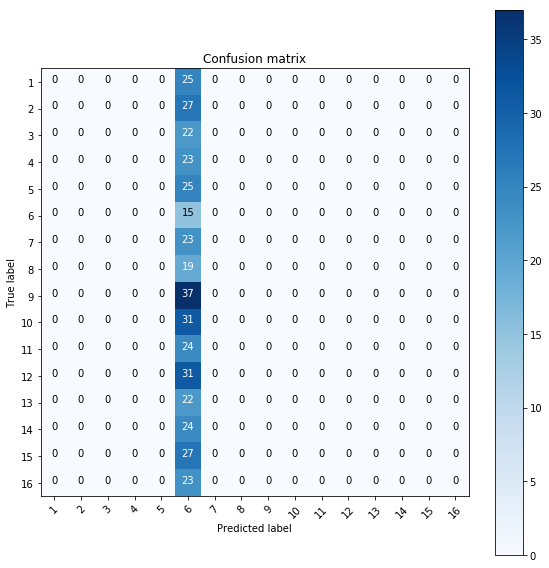

6 seconds


In [7]:
from sklearn.naive_bayes import BernoulliNB

starttime = datetime.now()

pipe_BernoulliNB = Pipeline([('clf', BernoulliNB())])
param_BernoulliNB = {'clf__alpha': [1, 0.8, 0.5, 0.2, 0], #default=1.0; Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
                     'clf__binarize': [0.0, ], #default =0.0; Threshold for binarizing (mapping to booleans) of sample features.
                     # If None, input is presumed to already consist of binary vectors.
                     'clf__fit_prior': [True, ], #default=True; Whether to learn class prior probabilities. false:a uniform prior will be used.
                     'clf__class_prior': [None, ], #default =None, array-like, size=[n_classes,]
                     #Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
                    }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_BernoulliNB, param_BernoulliNB)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2  Naive Bayes.GaussianNB
'''
Gaussian Naive Bayes (GaussianNB)

Can perform online updates to model parameters via partial_fit method. 
For details on algorithm used to update feature means and variance online, see Stanford CS tech report STAN-CS-79-773 by Chan...:

http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
'''

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


df_R0 [10] precison: [ 0.06  0.07  0.07] recall: [ 0.06  0.07  0.07] f1: [ 0.06  0.07  0.07]
Pipeline(steps=[('clf', GaussianNB(priors=None))])
             precision    recall  f1-score   support

          1       0.15      0.20      0.17        25
          2       0.04      0.04      0.04        27
          3       0.03      0.05      0.04        22
          4       0.04      0.04      0.04        23
          5       0.05      0.04      0.05        25
          6       0.04      0.07      0.05        15
          7       0.00      0.00      0.00        23
          8       0.04      0.05      0.05        19
          9       0.18      0.08      0.11        37
         10       0.06      0.03      0.04        31
         11       0.05      0.04      0.04        24
         12       0.12      0.10      0.11        31
         13       0.05      0.05      0.05        22
         14       0.00      0.00      0.00        24
         15       0.11      0.11      0.11        27
       

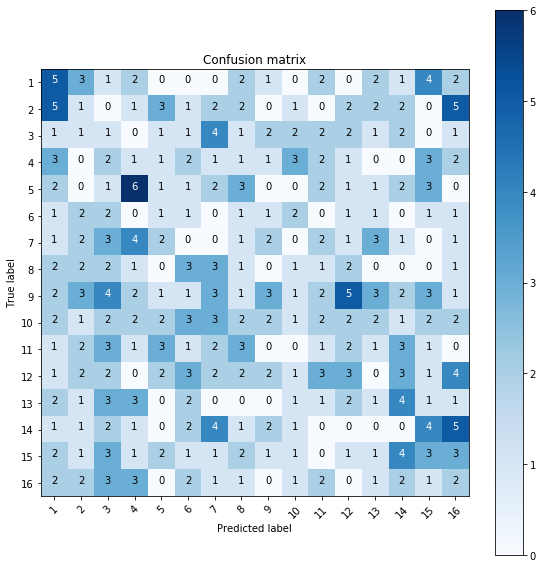

5 seconds


In [9]:
from sklearn.naive_bayes import GaussianNB

starttime = datetime.now()

pipe_GaussianNB = Pipeline([('clf', GaussianNB())])
param_GaussianNB = {'clf__priors': [None, ], #default =None, array-like, size=[n_classes,]
                     #Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
                    }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_GaussianNB, param_GaussianNB)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    3  Naive Bayes.MultinomialNB
'''
Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). 
The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.
'''

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.0s finished


df_R0 [10] precison: [ 0.06  0.06  0.07] recall: [ 0.06  0.06  0.07] f1: [ 0.06  0.06  0.07]
Pipeline(steps=[('clf', MultinomialNB(alpha=1, class_prior=None, fit_prior=True))])
             precision    recall  f1-score   support

          1       0.14      0.16      0.15        25
          2       0.04      0.04      0.04        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.08      0.08      0.08        25
          6       0.00      0.00      0.00        15
          7       0.04      0.04      0.04        23
          8       0.00      0.00      0.00        19
          9       0.10      0.05      0.07        37
         10       0.14      0.10      0.12        31
         11       0.00      0.00      0.00        24
         12       0.11      0.10      0.10        31
         13       0.16      0.18      0.17        22
         14       0.04      0.04      0.04        24
         15       0.13     

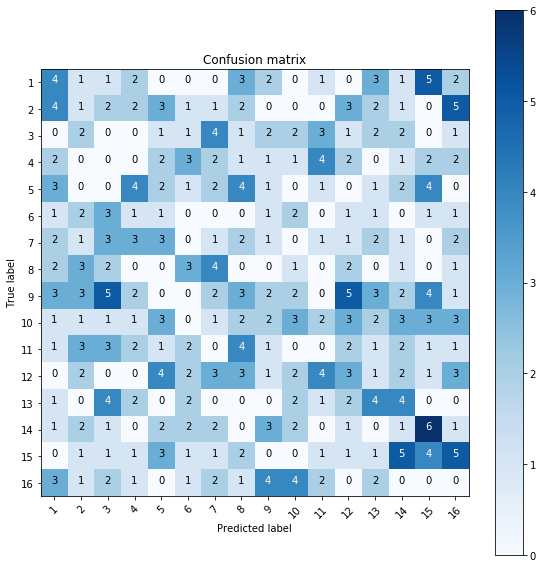

6 seconds


In [10]:
from sklearn.naive_bayes import MultinomialNB

starttime = datetime.now()

pipe_MultinomialNB = Pipeline([('clf', MultinomialNB())])
param_MultinomialNB = {'clf__alpha': [1, 0.8, 0.5, 0.2, 0], #default=1.0; Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
                     'clf__fit_prior': [True, ], #default=True; Whether to learn class prior probabilities. false:a uniform prior will be used.
                     'clf__class_prior': [None, ], #default =None, array-like, size=[n_classes,]
                     #Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
                    }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_MultinomialNB, param_MultinomialNB)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')